In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
#randomly generating the negative samples
result = []

count_negative =  0
while count_negative < 200:
    x1 = round(random.uniform(0,3.3),2)
    x2 = round(random.uniform(0,2.5),2)

    if 3*x1 + 4*x2 -10 < 0:
        result.append([x1,x2,-1])
        count_negative +=1



In [3]:
#randomly generating the positive samples
count_positive =  0
while count_positive < 200:
    x1 = round(random.uniform(0,3.3),2)
    x2 = round(random.uniform(0,2.5),2)

    if 3*x1 + 4*x2 -10 > 0:
        result.append([x1,x2,+1])
        count_positive +=1


In [4]:
#putting all the randomly generated positive and negative samples in a dataset
dataset = pd.DataFrame(result,columns = ["x1","x2","y"])
print(dataset)


       x1    x2  y
0    1.97  0.02 -1
1    0.07  2.30 -1
2    1.82  0.17 -1
3    1.66  0.16 -1
4    0.10  1.45 -1
..    ...   ... ..
395  2.95  0.49  1
396  1.57  1.44  1
397  2.99  0.47  1
398  1.52  1.77  1
399  0.45  2.35  1

[400 rows x 3 columns]


In [5]:
count = dataset.count()
print(f"The total of records is \n \n{count}")

The total of records is 
 
x1    400
x2    400
y     400
dtype: int64


In [6]:
# Get the independent(x1 and x2) and Dependent(y1) values 

x1 =list(dataset.iloc[0:,0:1].values)
x2 =list(dataset.iloc[0:,1:2].values)
y1 = list(dataset.iloc[0:,2:3].values)

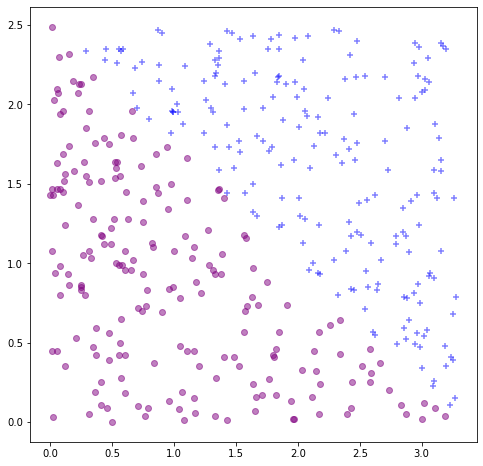

In [7]:
# Data Visualization of the dataset
plot1 = plt
plot1.rcParams["figure.figsize"] = (8,8)
for a,b,c in zip(x1,x2,y1):
    if c == 1:
        plot1.scatter(a, b, alpha=0.5, marker='+',color = 'blue',
            label="Legend", cmap="plasma")
    else:
        plot1.scatter(a,b, alpha=0.5, marker='o', color = 'purple',
            label ="Legend",cmap = 'plasma')

In [8]:
# Selecting the values of the independent and dependent for training
X = dataset.iloc[:,0:2]
y = dataset.iloc[:,2:]

In [9]:
# Data preprocessing 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#X = sc.fit_transform(X)

In [10]:
# Spliting the dataset into training and test set
from sklearn.model_selection import train_test_split
(X_train,X_test,y_train,y_test) = train_test_split(X,y,test_size = 0.2,random_state= 1000)  

In [11]:
# Implementing the Perceptron learning algorithm

from sklearn.linear_model import Perceptron

# instantiate an object of the perceptron class
model = Perceptron()

# fitting the perceptron model on the train set
model.fit(X_train,y_train.values.ravel())

Perceptron()

In [12]:
# Predicting the model on the training set 
predicted_train_value =model.predict(X_train)
predicted_train_value

array([ 1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1,
        1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
        1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1,
       -1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1, -1,
        1,  1, -1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,
       -1, -1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1,
        1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1,
       -1,  1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1,
        1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1, -1,  1,  1,
       -1, -1, -1,  1, -1

In [13]:
# Predicting the model on the test set 
predicted_test_value =model.predict(X_test)
predicted_test_value

array([ 1, -1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1,
       -1, -1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1,
       -1,  1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1,
        1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1], dtype=int64)

In [14]:
from sklearn.metrics import confusion_matrix,accuracy_score

# Confusion matrix on the test set
cm_test = confusion_matrix(y_test,predicted_test_value)
print(cm_test)

print()

# Confusion Matrix on the train set
cm_train = confusion_matrix(y_train,predicted_train_value)


print(cm_train)



[[37  1]
 [ 0 42]]

[[162   0]
 [  0 158]]


In [15]:
# Accuracy for testing and training  
training_accuracy = accuracy_score(y_train,model.predict(X_train))
print(f"The training accuracy is {training_accuracy}")

test_accuracy = accuracy_score(y_test,model.predict(X_test))
print(f"The test accuracy is {test_accuracy}")

The training accuracy is 1.0
The test accuracy is 0.9875


In [16]:
# The line of best fit
w1,w2  = model.coef_[0]
intercept = model.intercept_[0]
x1_boundaries = [0,-intercept/w1]
x2_boundaries = [-intercept/w2,0]


# The max and reach 
weigths = model.coef_[0]
weigths = np.array(weigths).reshape(2,1)

gamma = float("inf")

for x in np.array(X):
   
    x = x.reshape(2,1)
    product = weigths*x
    distance = np.linalg.norm(product)
    if distance != 0:
        gamma = min(distance,gamma )

# upper_bound
x1_upper_boundaries =  [0,-intercept/w1 + gamma]
x2_upper_boundaries = [-intercept/w2 + gamma,0]

# lower_bound
x1_lower_boundaries  = [0,-intercept/w1 - gamma ]
x2_lower_boundaries = [-intercept/w2 - gamma,0]

print(gamma)


0.22853708670585626


Text(0.5, 1.0, 'Scatter plot showing the line of best fit using a perceptron model')

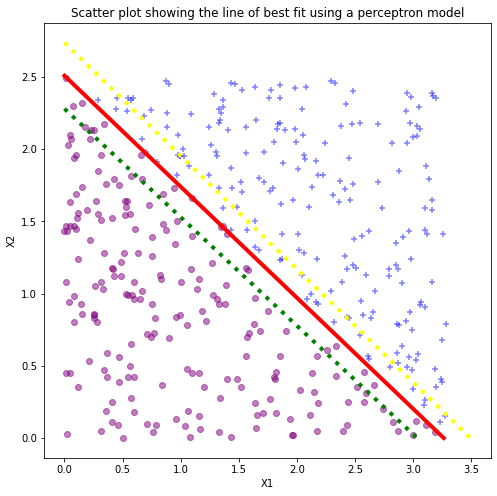

In [17]:
#plotting the upper boundaries and lower boundaries
plot1 = plt
plot1.rcParams["figure.figsize"] = (8,8)
for a,b,c in zip(x1,x2,y1):
    if c == 1:
        plot1.scatter(a, b, alpha=0.5, marker='+',color = "blue",
            label="Legend", cmap="plasma")
    else:
        plot1.scatter(a,b, alpha=0.5, marker='o',color="purple",
            label ="Legend",cmap = 'plasma')

plot1.plot(x1_boundaries,x2_boundaries,color ="red",lw = 4)

plot1.plot(x1_upper_boundaries,x2_upper_boundaries,color ="yellow", linestyle= 'dotted',lw = 4)

plot1.plot(x1_lower_boundaries,x2_lower_boundaries,color ="green",linestyle= 'dotted', lw = 4)
plot1.xlabel("X1")
plot1.ylabel("X2")
plot1.title("Scatter plot showing the line of best fit using a perceptron model")
